<H1 style="font-size:50px">8: Grafici</H1>

<div style = "width:95%; padding:5px 10px 5px;  margin:50px 0px 10px 10px; font-size:18px">
<UL>
    <LI> Come creare un oggetto grafico
    <LI> Come disegnare un set di punti
    <LI> Gli elementi di un grafico
    <LI> Come disegnare una o più funzioni
    <LI> Come fare plot logaritmici
    <LI> Come fare gli istogrammi
    <LI> Come salvare un plot su file
    <LI> Cos'è e come fare un plot parametrico
</UL>
</div>

<hr>

## 8.1 Nozioni fondamentali
Potete trovare una eccellente introduzione a Matplotlib nella Sezione 5 di<br/> 
[Robert Johanson - Scientific Computing with Python](http://raw.github.com/jrjohansson/scientific-python-lectures/master/Scientific-Computing-with-Python.pdf)<br/>
Johanson utilizza lo stesso approccio "object oriented" che viene adottato in queste lezioni.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

<div style= 'padding:20px 20px 0px 150px;'>
    <img src="../Humour/MisleadingGraphs.jpg" width="500" align="center"/>
</div>

Il modo più semplice per iniziare un grafico è la funzione `subplots`. La chiamata a `subplots` restituisce un oggetto di tipo `Figure`, che corrisponde alla pagina in cui il plot (o il gruppo di plot) è contenuto, e uno o più oggetti di tipo `AxesSubplot` che corrispondono ai singoli grafici. I plot si costruiscono applicando i metodi opportuni ai corrispondenti oggetti.<BR>
In Jupyter il grafico viene mostrato quando si esegue la cella. Se non chiamiamo alcun metodo per costruire il grafico, viene mostrato un plot elementare con parametri di default.
    
Nella cella seguente l'oggetto di tipo `Figure` viene assegnato alla variabile `fig`. L'oggetto di tipo  `AxesSubplot` viene assegnato
alla variabile `ax`. 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
print('fig:',type(fig))
print(' ax:',type(ax))

Nel caso ci siano più plot questi vengono assegnati ad una ntupla:

In [ ]:
fig, (ax_1,ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

In [ ]:
fig, (ax_1,ax_2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

In [ ]:
fig, ax_tuple = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

## 8.2 Plot di una lista di  numeri. Scatterplots
Ciascuna linea nel grafico si genera con una chiamata al metodo `plot` applicato all'oggetto di tipo `AxesSubplot` restituito da `subplots`. Per disegnare set di punti si usa il metodo `scatter`.

In [ ]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax1.plot(np.array([1,2,4,3]))   # Valori dell'ordinata. I valori dell'ascissa sono impliciti.

In [ ]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax1.plot(np.array([1,2,3,4]),np.array([1,4,9,16]))    # Valori dell'ascissa. Valori dell'ordinata.

In [ ]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax1.scatter(np.array([1,2,3,4]),np.array([1,4,9,16]))    # Valori dell'ascissa. Valori dell'ordinata.

## 8.3 Titoli, Nomi degli assi, Colori, LineStyle.

Disegna punti (x,y). La prima lista contiene le coordinate x, la seconda le coordinate y.
`marker` determina il simbolo usato per i punti. 'o' corrisponde a pallini. `c` oppure `color` determina il colore del simbolo. 'b' significa blue (red: 'r', green: 'g', nero: '0', ). `linestyle` determina il tipo di linea: per esempio `solid`, `dashed`, `dotted`, `dashdotted`. Nelle chiamate a `plot` di default non ci sono marker e i punti sono uniti da linee.<BR>
I metodi `set_title`, `set_xlabel`, `set_ylabel` assegnano titoli al plot, all'asse delle ordinate, all'asse delle ascisse.

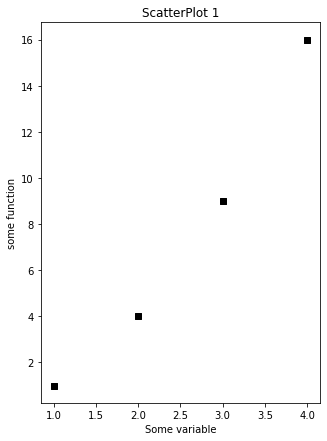

In [4]:
fig2, ax2 = plt.subplots(figsize=(5, 7)) 
ax2.set_ylabel('some function')
ax2.set_xlabel('Some variable')
ax2.set_title('ScatterPlot 1')
ax2.scatter(np.array([1,2,3,4]),np.array([1,4,9,16]), marker='s', c='0') 

In [ ]:
fig2, ax2 = plt.subplots(figsize=(5, 7)) 
ax2.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_title('Plot 1')
ax2.plot(np.array([1,2,3,4]),np.array([1,4,9,16]), linestyle='dashed', color='red') 

### Estremi degli assi
Di default, Matplotlib sceglie gli estremi degli assi in modo che tutti i punti che vengono passati al comando `plot` o `scatterplot` siano visibili nel grafico. L'utente può però fissare gli estremi con `set_xlim`, `set_ylim`.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.array([1,2,3,4]),np.array([1,4,9,16]), c='b', label='g1')
ax.set_xlim(-1.,2.5)
ax.set_ylim(-1.5,10.)

### Griglie

Le griglie sono linee che facilitano la lettura delle coordinate dei punti di un grafico. Il default è che non vengano disegnate.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
x = np.linspace(0,4,201)
ax.plot(x,x*x)
ax.grid()

help(ax.grid) per ulteriori informazioni

## 8.4 Fare il grafico di una funzione nota `f(x)`

Il modo più semplice per fare il grafico di una funzione `f(x)`è:

- Generare un set apportuno `xval` di ascisse in cui calcolare i valori di `f`, tipicamente usando `arange` o `linspace`.
- Scrivere una funzione che restituisca i valori `yval` di `f(x)` nei punti `xval`.
- Costruire il grafico usando il metodo plt.plot(xval,yval,......)

In [ ]:
def my_f(x):
    return 2*x**3 + 3*x**2 - 12*x -10

xval = np.arange(-4,3,0.1)
yval = my_f(xval)

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('x coordinate')
ax.set_ylabel('my_f(x)')
ax.set_title('Plot of my_f')
ax.grid()

ax.plot(xval,yval); # Il ; alla fine del comando plot elimina la stampa della locazione in memoria del plot

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Fate il grafico di y(x) = cos(x)/(x**2+1) nell'intervallo -5 < x < 2 usando una linea rossa. Introducete nomi opportuni per gli assi. Inserite una griglia per semplificare la lettura del plot.
</OL>
</div>

## 8.5 Plot multipli

### Curve multiple in un singolo plot

È sufficiente dare il comando `plot` su un singolo `ax` per tutte le curve da disegnare

In [ ]:
t = np.arange(0.0, 2*np.pi, 0.01)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(t,np.cos(t),c='r')
ax.plot(t,np.cos(2*t),c='b')
ax.plot(t,np.cos(10*t),c='g')

### Plot multipli in una sola figura.

È necessario creare, nella chiamata a `plt.subplots`, tanti oggetti di tipo `ax` quanti sono i plot che si vogliono ottenere.
Ciascuno dei comandi successivi si riferirà ad uno specifico oggetto `ax`.

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig3, (ax3a,ax3b) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax3a.plot(t1, f(t1),  marker='o', c='b')
ax3a.set_xlabel('x value') 
ax3a.set_ylabel('f(x)') 
ax3a.set_title('Plot 1')

ax3b.plot(t2, np.cos(2*np.pi*t2),  linestyle='--', c='r')
ax3b.set_xlabel('x value') 
ax3b.set_ylabel('cos(2 pi x)') 
ax3b.set_title('Plot 2')

fig3.tight_layout()

# Percontrollare lo spazio fra i plot potete usare fig3.tight_layout(pad=3.6)
# help(fig3.tight_layout) per ulteriori informazioni

# linestyle='-','--',':'

Per ottenere quattro plot in due file da due utilizzare:

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

Un'altra possibilità è assegnare l'ntupla degli ax ad un unica variabile e poi utilizzare gli indici. In questo modo è possibile fare un ciclo `for` sui plot:

In [ ]:
fig1, my_ax = plt.subplots(nrows=2, ncols=2)
my_ax[0,1].plot(np.array([1,2,3])) 

### Titolo centrato per tutta la figura

In [ ]:
fig1, my_ax = plt.subplots(nrows=2, ncols=2)
my_ax[0,1].plot(np.array([1,2,3]))
my_ax[0,1].set_title("One line")
plt.suptitle("Four Plots with one line");
fig1.tight_layout()

## 8.6 Salvare una figura in un file

L'estensione del file determina il formato in cui viene salvata la figura

In [ ]:
fig3.savefig('plot3.pdf')
fig3.savefig('plot3.jpg')

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Fate il grafico di y1(x) = cos(x)/(x**2+1) e y2(x) = (cos(x)+x)/(x**2+1) nell'intervallo -5 < x < 2 in un unico plot. Introducete nomi opportuni per gli assi. Inserite una griglia per semplificare la lettura del plot.
<LI>Fate il grafico di y1(x) = cos(x) e y2(x) = cos(x)+x nell'intervallo -2 < x < 2 in due plot affiancati. Utilizzate colori diversi per le due curve. Introducete nomi opportuni per gli assi di entrambi i plot.
</OL>
</div>

## 8.7 Plot logaritmici

Per avere una scala logaritmica sull'asse `x`, `y` si usano i metodi `set_xscale('log')`, `set_yscale('log')` sugli oggetti di tipo `AxesSubplot`

In [ ]:
fig4, (ax4a,ax4b) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

t = np.arange(0.01, 20.0, 0.01)

# log y axis
ax4a.set_yscale('log')
ax4a.plot(t, np.exp(-t/5.0))
ax4a.set_xlabel('x value') 
ax4a.set_ylabel('exp(-t/5.0)') 
ax4a.set_title('semilogy')
ax4a.grid(b=True,which='both')      # b significa boolean

# log x axis
ax4b.set_xscale('log')
ax4b.plot(t, np.sin(2*np.pi*t))
ax4b.set_xlabel('x value') 
ax4b.set_ylabel('sin(2*pi*t)') 
ax4b.set_title('semilogx')
ax4b.grid(b=True,which='both')


Di default vengono utilizzati logaritmi in base 10. È possibile specificare una base diversa:

In [ ]:
t = np.arange(0.01, 20.0, 0.01)

fig5, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

ax5.set_xscale('log',base=2)
ax5.set_yscale('log')
ax5.plot(t,t,c='r')
ax5.plot(t,t**2,c='b')
ax5.grid(b=True,which='both')
ax5.set_title('loglog base 2 on x')

I plot logaritmici sono essenziali quando ordinate e/o ascisse variano su molti ordini di grandezza.

In [ ]:
t = np.arange(0.01, 10.0, 0.01)

fig6, (ax6a,ax6b) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax6a.plot(t,t,c='r')
ax6a.plot(t,t**2,c='b')
ax6a.plot(t,t**4)
ax6a.set_title('linear')
ax6a.grid(b=True,which='both')

ax6b.set_yscale('log')
ax6b.plot(t,t,c='r')
ax6b.plot(t,t**2,c='b')
ax6b.plot(t,t**4)
ax6b.set_title('y-log')
ax6b.grid(b=True,which='both')

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Fate il grafico di y1(x) = np.e**(-x), y2(x) = np.e**(-2*x) nell'intervallo 0 < x < 10, in un unico plot, utilizzando una scala logaritmica per l'asse y. Introducete nomi opportuni per gli assi. Inserite una griglia per semplificare la lettura del plot.
</OL>
</div>

## 8.8 Istogrammi

I dati sono raggruppati in bin (contenitori, bidoni). L'altezza di ciascun bin corrisponde al numeri di dati che cadono fra i due valori della variabile che definiscono la base del bin. Cambiando il numero di bin e/o i loro estremi si cambia il plot.

In [ ]:
dati = np.array([1.95,1.96,1.9,1.9,1.84,1.81,2.06,1.99,1.93,1.97,2.02,1.92,1.95,1.88,1.87,2.03,1.85,2.08,1.96,1.81,
                2.07,1.91,1.79,1.99,1.97,1.95,1.96,1.93,1.83,2.09,2.02,2.09,1.84,1.86,1.96,2.03,1.93,1.9,1.94,1.87,
                1.97,1.91,1.87,1.81,2.06,2.02,1.96,1.81,1.93,2.03,1.92,1.96,1.8,1.95,1.9,2.02,2.03,1.9,2.03,2.02,
                1.96,1.9,1.98,1.87,1.9,1.89,1.84,2.06,1.93,2.06,1.93,1.93,1.9,1.9,1.9,1.93,1.86,1.83,1.96,1.81,2.03,
                1.98,1.84,1.86,1.96,1.81,1.98,1.84,1.86,1.96,1.92,1.96,1.85,2.04,2,1.92,1.9,2.15,1.94,1.92])

In [ ]:
nbins = 10
xrange = (1.75,2.20)    # ntupla

In [ ]:
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(dati, nbins, range=xrange)

In [ ]:
nevent       # Numero di eventi in ciacun bin

In [ ]:
bins         # Estremi dei bin

I patches sono i rettangoli (blu in questo caso) che vengono usati per disegnare l'istogramma.

## 8.9 Altri elementi dei plot

### Legende

Basato su https://realpython.com/python-matplotlib-guide/

In [ ]:
xc = np.arange(-5.0, 5.0, 0.02)

In [ ]:
def g1(x):
    return x*(x-1)/(x**2+1)-1

In [ ]:
yc1 = g1(xc)

In [ ]:
def g2(x):
    return (x-1)/(x**2+1)

In [ ]:
yc2 = g2(xc)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('g1=x*(x-1)/(x**2+1)-1, g2=(x-1)/(x**2+1)')
ax.set_xlabel('x value')
ax.set_ylabel('g(x)')
ax.grid(True)
ax.margins(x=0.,y=0.05)
ax.plot(xc, yc1, c='b', label='pippo rules', linestyle = '--');
ax.plot(xc, 3*yc2, 'k', label='g2');
ax.legend(fontsize='30');

### Testo

Il prefisso `r` davanti alle stringhe di testo inibisce l'interpretazione dei caratteri di "escape" come caratteri speciali. Importante perchè LaTeX usa il carattere "\\" per introdurre i comandi e "\\" è il carattere standard di "escape".

In [ ]:
def f0(t, omega, gamma, tau):
    wt = omega*t
    f1 = np.sin(wt) + (np.cos(wt)-1.0)/wt
    f2 = 1.0+(gamma/omega)*f1
    return np.exp(-t*f2/tau)

omega = 12.0
gamma = 8.0
tau = 1.0

t = np.linspace(0.01, 10.0, 500)
f = f0(t, omega, gamma, tau)

fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.plot(t, f)
ax.set_ylabel(r'$f_0(t)$', fontsize=14)
#ax.set_ylabel('$f_0(t)$', fontsize=14)   # r è superfluo per questa stringa in cui non ci sono caratteri "escape"
ax.set_xlabel(r'$t/\tau\quad\rm(ms)}$', fontsize=14)
#ax.set_xlabel('$t/\tau\quad\rm(ms)}$', fontsize=14)       # r è necessario per questa stringa in cui compare 
                                                           # il carattere "\" come parte di LaTeX
plt.text(1.8, 0.85, r'$\Gamma(z)=\int_0^\infty x^{z-1}e^{-x}dx$', {'color': 'k', 'fontsize': 14})
plt.text(4.0, 0.4, r'$\Gamma(z)=\int_0^\infty x^{z-1}e^{-x}dx$', {'color': 'b', 'fontsize': 20})

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#b8d0d0; margin:20px 0px 10px 10px">
    <h4> Imparare Facendo</h4>
    
<OL>
<LI>Fate l'istogramma dell'array a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]). Qual'è un <b>range</b> ragionevole? Variate il numero di bin fra 1 e 10.
</OL>
</div>

### Subplots

In [ ]:
def my_f(x):
    return 2*x**3 + 3*x**2 - 12*x -10

xval = np.arange(-4,3,0.1)
yval = my_f(xval)

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('x coordinate')
ax.set_ylabel('my_f(x)')
ax.set_title('Plot of my_f')
ax.grid()

ax.plot(xval,yval); # Il ; alla fine del comando plot elimina la stampa della locazione in memoria del plot

ax2 = plt.axes([0.3, 0.2, 0.3, 0.2]) # [x_left_lower_corner,y_left_lower_corner,x_width,y_width] in axis coordinates

xval2 = np.arange(0,2*np.pi,0.1)
yval2 = np.cos(xval2)
ax2.grid()
ax2.plot(xval2,yval2);


## 8.10 Plot parametrici

Spesso per descrivere una curva esprimiamo le coordinate `y` dei punti sulla curva in funzione delle loro coordinate `x`. Per esempio una semicirconferenza centrata nell'origine è descritta dalla relazione $ y(x) = \sqrt{r^2 - x^2}$, dove $r$ è il raggio.<BR>
Un modo alternativo di costruire i punti sul cerchio di raggio $r$ è di notare che possiamo usare come coordinata l'angolo del punto rispetto all'asse $\hat{x}$ come:
    $$ x(\theta) = r \cos\theta,\qquad y(\theta) = r \sin\theta$$
Se creiamo due array sufficientemente fitti in questo modo, possiamo disegnare una circonferenza.

In [ ]:
raggio = 3.
npoints = 100
x0 = np.array([np.cos(i*2*np.pi/npoints) for i in range(npoints+1)])
y0 = np.array([np.sin(i*2*np.pi/npoints) for i in range(npoints+1)])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x0, y0)

Provate a vedere cosa succede per npoints = 3,4,8,12.

Problema:
---------

Studiare la funzione $g(x)\, = \, \cos \left( \frac{x^4 - 5 x^3 - 3 x^2 + 17 x - 10}{x^4 + 2 x^2 + 1} \right)$

<div style = "width:95%; padding:5px 10px 5px; border-style:solid; border-width:0px 0px 0px 10px; border-color:#ff0000; margin:20px 0px 10px 10px">
    <h4> Attenzione!</h4>
   La possibilità di fare il grafico di una qualsiasi funzione con pochissima fatica rrichiede di cambiare completamente l'approccio che vi è stato insegnato alle scuole superiori sul modo di studiare le funzioni. Fare il grafico deve diventare il passo preliminare a qualsiasi altra manipolazione.
</div>

Informazini addizionali e buoni esempi: https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/